In [18]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [19]:
import os, shutil

base_dir = 'E:\\Chii\\百度云\\GitHub\\DeepLearning\\PictureColoring\\study\\5.2\\cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')


In [20]:
from keras import optimizers 
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [21]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             )
test_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')


Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [22]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=100, 
                              validation_data=validation_generator,
                              validation_steps=50)
model.save('cats_and_dogs_small_1.h5')

Epoch 1/100


  1/100 [..............................] - ETA: 2:37 - loss: 0.7142 - acc: 0.3750

  3/100 [..............................] - ETA: 53s - loss: 0.7161 - acc: 0.4479 

  5/100 [>.............................] - ETA: 34s - loss: 0.7037 - acc: 0.4938

  6/100 [>.............................] - ETA: 33s - loss: 0.7110 - acc: 0.4688

  7/100 [=>............................] - ETA: 32s - loss: 0.7084 - acc: 0.4777

  8/100 [=>............................] - ETA: 31s - loss: 0.7071 - acc: 0.4766

  9/100 [=>............................] - ETA: 31s - loss: 0.7062 - acc: 0.4722

 10/100 [==>...........................] - ETA: 30s - loss: 0.7053 - acc: 0.4688

 11/100 [==>...........................] - ETA: 29s - loss: 0.7056 - acc: 0.4574

 12/100 [==>...........................] - ETA: 28s - loss: 0.7042 - acc: 0.4661

 13/100 [==>...........................] - ETA: 28s - loss: 0.7016 - acc: 0.4832

 14/100 [===>..........................] - ETA: 27s - loss: 0.7009 - acc: 0.4866

 15/100 [===>..........................] - ETA: 27s - loss: 0.7032 - acc: 0.4771

 16/100 [===>..........................] - ETA: 27s - loss: 0.7029 - acc: 0.4746

 17/100 [====>.........................] - ETA: 26s - loss: 0.7023 - acc: 0.4761

 18/100 [====>.........................] - ETA: 25s - loss: 0.7016 - acc: 0.4844

 19/100 [====>.........................] - ETA: 25s - loss: 0.7018 - acc: 0.4803

 20/100 [=====>........................] - ETA: 24s - loss: 0.7015 - acc: 0.4781

 21/100 [=====>........................] - ETA: 24s - loss: 0.7009 - acc: 0.4836

 22/100 [=====>........................] - ETA: 23s - loss: 0.7007 - acc: 0.4844

 23/100 [=====>........................] - ETA: 23s - loss: 0.7005 - acc: 0.4783

 24/100 [======>.......................] - ETA: 23s - loss: 0.7000 - acc: 0.4818

 25/100 [======>.......................] - ETA: 22s - loss: 0.7004 - acc: 0.4775

 26/100 [======>.......................] - ETA: 22s - loss: 0.7001 - acc: 0.4772

 27/100 [=======>......................] - ETA: 22s - loss: 0.7000 - acc: 0.4792

 28/100 [=======>......................] - ETA: 22s - loss: 0.6997 - acc: 0.4810

 29/100 [=======>......................] - ETA: 21s - loss: 0.6995 - acc: 0.4828

 30/100 [========>.....................] - ETA: 21s - loss: 0.6991 - acc: 0.4844

 31/100 [========>.....................] - ETA: 21s - loss: 0.6986 - acc: 0.4869

 32/100 [========>.....................] - ETA: 20s - loss: 0.6991 - acc: 0.4824

 33/100 [========>.....................] - ETA: 20s - loss: 0.6990 - acc: 0.4830

 34/100 [=========>....................] - ETA: 20s - loss: 0.6987 - acc: 0.4835

 35/100 [=========>....................] - ETA: 19s - loss: 0.6987 - acc: 0.4830

 36/100 [=========>....................] - ETA: 19s - loss: 0.6986 - acc: 0.4826

 37/100 [==========>...................] - ETA: 19s - loss: 0.6986 - acc: 0.4797

 38/100 [==========>...................] - ETA: 18s - loss: 0.6985 - acc: 0.4786

 39/100 [==========>...................] - ETA: 18s - loss: 0.6984 - acc: 0.4784

 40/100 [===========>..................] - ETA: 18s - loss: 0.6983 - acc: 0.4789

 41/100 [===========>..................] - ETA: 17s - loss: 0.6981 - acc: 0.4802

 42/100 [===========>..................] - ETA: 17s - loss: 0.6979 - acc: 0.4829

 43/100 [===========>..................] - ETA: 16s - loss: 0.6972 - acc: 0.4869

 44/100 [============>.................] - ETA: 16s - loss: 0.6977 - acc: 0.4858

 45/100 [============>.................] - ETA: 16s - loss: 0.6983 - acc: 0.4819

 46/100 [============>.................] - ETA: 15s - loss: 0.6983 - acc: 0.4817

 47/100 [=============>................] - ETA: 15s - loss: 0.6982 - acc: 0.4814

 48/100 [=============>................] - ETA: 15s - loss: 0.6980 - acc: 0.4831

 49/100 [=============>................] - ETA: 14s - loss: 0.6979 - acc: 0.4834

 50/100 [==============>...............] - ETA: 14s - loss: 0.6976 - acc: 0.4863

 51/100 [==============>...............] - ETA: 14s - loss: 0.6971 - acc: 0.4890

 52/100 [==============>...............] - ETA: 13s - loss: 0.6969 - acc: 0.4898

 53/100 [==============>...............] - ETA: 13s - loss: 0.6972 - acc: 0.4882

 54/100 [===============>..............] - ETA: 13s - loss: 0.6970 - acc: 0.4902

 55/100 [===============>..............] - ETA: 12s - loss: 0.6969 - acc: 0.4903

 56/100 [===============>..............] - ETA: 12s - loss: 0.6968 - acc: 0.4905

 57/100 [================>.............] - ETA: 12s - loss: 0.6965 - acc: 0.4923

 58/100 [================>.............] - ETA: 12s - loss: 0.6960 - acc: 0.4946

 59/100 [================>.............] - ETA: 11s - loss: 0.6958 - acc: 0.4958

 60/100 [=================>............] - ETA: 11s - loss: 0.6962 - acc: 0.4943

 61/100 [=================>............] - ETA: 11s - loss: 0.6960 - acc: 0.4954

 62/100 [=================>............] - ETA: 10s - loss: 0.6955 - acc: 0.4980

 63/100 [=================>............] - ETA: 10s - loss: 0.6956 - acc: 0.4975

 64/100 [==================>...........] - ETA: 10s - loss: 0.6955 - acc: 0.4985

 65/100 [==================>...........] - ETA: 9s - loss: 0.6958 - acc: 0.4966 

 66/100 [==================>...........] - ETA: 9s - loss: 0.6959 - acc: 0.4953

 67/100 [===================>..........] - ETA: 9s - loss: 0.6956 - acc: 0.4977

 68/100 [===================>..........] - ETA: 9s - loss: 0.6958 - acc: 0.4963

 69/100 [===================>..........] - ETA: 8s - loss: 0.6955 - acc: 0.4982

 70/100 [====================>.........] - ETA: 8s - loss: 0.6959 - acc: 0.4946

 71/100 [====================>.........] - ETA: 8s - loss: 0.6959 - acc: 0.4938

 72/100 [====================>.........] - ETA: 7s - loss: 0.6958 - acc: 0.4952

 73/100 [====================>.........] - ETA: 7s - loss: 0.6958 - acc: 0.4944

 74/100 [=====================>........] - ETA: 7s - loss: 0.6958 - acc: 0.4941

 75/100 [=====================>........] - ETA: 7s - loss: 0.6958 - acc: 0.4954

 76/100 [=====================>........] - ETA: 6s - loss: 0.6957 - acc: 0.4971

 77/100 [======================>.......] - ETA: 6s - loss: 0.6957 - acc: 0.4972

 78/100 [======================>.......] - ETA: 6s - loss: 0.6958 - acc: 0.4968

 79/100 [======================>.......] - ETA: 5s - loss: 0.6957 - acc: 0.4972

 80/100 [=======================>......] - ETA: 5s - loss: 0.6956 - acc: 0.4984

 81/100 [=======================>......] - ETA: 5s - loss: 0.6956 - acc: 0.4973

 82/100 [=======================>......] - ETA: 5s - loss: 0.6955 - acc: 0.4996

 83/100 [=======================>......] - ETA: 4s - loss: 0.6955 - acc: 0.4985

 84/100 [========================>.....] - ETA: 4s - loss: 0.6954 - acc: 0.4996

 85/100 [========================>.....] - ETA: 4s - loss: 0.6954 - acc: 0.5004

 86/100 [========================>.....] - ETA: 3s - loss: 0.6954 - acc: 0.4996

 87/100 [=========================>....] - ETA: 3s - loss: 0.6953 - acc: 0.5007

 88/100 [=========================>....] - ETA: 3s - loss: 0.6952 - acc: 0.5028

 89/100 [=========================>....] - ETA: 3s - loss: 0.6951 - acc: 0.5035

 90/100 [==========================>...] - ETA: 2s - loss: 0.6950 - acc: 0.5052

 91/100 [==========================>...] - ETA: 2s - loss: 0.6955 - acc: 0.5024

 92/100 [==========================>...] - ETA: 2s - loss: 0.6955 - acc: 0.5024

 93/100 [==========================>...] - ETA: 1s - loss: 0.6954 - acc: 0.5024

 94/100 [===========================>..] - ETA: 1s - loss: 0.6952 - acc: 0.5037

 95/100 [===========================>..] - ETA: 1s - loss: 0.6951 - acc: 0.5039

 96/100 [===========================>..] - ETA: 1s - loss: 0.6949 - acc: 0.5046

 97/100 [============================>.] - ETA: 0s - loss: 0.6948 - acc: 0.5055

 98/100 [============================>.] - ETA: 0s - loss: 0.6955 - acc: 0.5032

 99/100 [============================>.] - ETA: 0s - loss: 0.6955 - acc: 0.5032

100/100 [==============================] - 33s 328ms/step - loss: 0.6956 - acc: 0.5016 - val_loss: 0.6888 - val_acc: 0.5869


Epoch 2/100
  1/100 [..............................] - ETA: 3s - loss: 0.6869 - acc: 0.6562

  3/100 [..............................] - ETA: 3s - loss: 0.6881 - acc: 0.6042

  5/100 [>.............................] - ETA: 3s - loss: 0.6896 - acc: 0.5625

  7/100 [=>............................] - ETA: 3s - loss: 0.6908 - acc: 0.5357

  9/100 [=>............................] - ETA: 3s - loss: 0.6906 - acc: 0.5382

 11/100 [==>...........................] - ETA: 3s - loss: 0.6915 - acc: 0.5312

 12/100 [==>...........................] - ETA: 3s - loss: 0.6911 - acc: 0.5365

 13/100 [==>...........................] - ETA: 6s - loss: 0.6912 - acc: 0.5312

 14/100 [===>..........................] - ETA: 8s - loss: 0.6909 - acc: 0.5379

 15/100 [===>..........................] - ETA: 9s - loss: 0.6907 - acc: 0.5396

 16/100 [===>..........................] - ETA: 10s - loss: 0.6908 - acc: 0.5391

 17/100 [====>.........................] - ETA: 11s - loss: 0.6906 - acc: 0.5404

 18/100 [====>.........................] - ETA: 11s - loss: 0.6904 - acc: 0.5399

 19/100 [====>.........................] - ETA: 12s - loss: 0.6898 - acc: 0.5428

 20/100 [=====>........................] - ETA: 12s - loss: 0.6907 - acc: 0.5359

 21/100 [=====>........................] - ETA: 13s - loss: 0.6903 - acc: 0.5372

 22/100 [=====>........................] - ETA: 13s - loss: 0.6901 - acc: 0.5398

 23/100 [=====>........................] - ETA: 13s - loss: 0.6899 - acc: 0.5421

 24/100 [======>.......................] - ETA: 13s - loss: 0.6887 - acc: 0.5456

 25/100 [======>.......................] - ETA: 14s - loss: 0.6887 - acc: 0.5437

 26/100 [======>.......................] - ETA: 14s - loss: 0.6886 - acc: 0.5445

 27/100 [=======>......................] - ETA: 14s - loss: 0.6879 - acc: 0.5451

 28/100 [=======>......................] - ETA: 14s - loss: 0.6870 - acc: 0.5502

 29/100 [=======>......................] - ETA: 14s - loss: 0.6851 - acc: 0.5539

 30/100 [========>.....................] - ETA: 14s - loss: 0.6891 - acc: 0.5479

 31/100 [========>.....................] - ETA: 14s - loss: 0.6886 - acc: 0.5494

 32/100 [========>.....................] - ETA: 14s - loss: 0.6892 - acc: 0.5449

 33/100 [========>.....................] - ETA: 14s - loss: 0.6889 - acc: 0.5473

 34/100 [=========>....................] - ETA: 14s - loss: 0.6889 - acc: 0.5460

 35/100 [=========>....................] - ETA: 13s - loss: 0.6890 - acc: 0.5446

 36/100 [=========>....................] - ETA: 13s - loss: 0.6886 - acc: 0.5486

 37/100 [==========>...................] - ETA: 13s - loss: 0.6883 - acc: 0.5490

 38/100 [==========>...................] - ETA: 13s - loss: 0.6883 - acc: 0.5502

 39/100 [==========>...................] - ETA: 13s - loss: 0.6890 - acc: 0.5465

 40/100 [===========>..................] - ETA: 13s - loss: 0.6886 - acc: 0.5492

 41/100 [===========>..................] - ETA: 12s - loss: 0.6891 - acc: 0.5480

 42/100 [===========>..................] - ETA: 12s - loss: 0.6891 - acc: 0.5476

 43/100 [===========>..................] - ETA: 12s - loss: 0.6893 - acc: 0.5472

 44/100 [============>.................] - ETA: 12s - loss: 0.6890 - acc: 0.5483

 45/100 [============>.................] - ETA: 12s - loss: 0.6890 - acc: 0.5472

 46/100 [============>.................] - ETA: 12s - loss: 0.6890 - acc: 0.5469

 47/100 [=============>................] - ETA: 11s - loss: 0.6889 - acc: 0.5479

 48/100 [=============>................] - ETA: 11s - loss: 0.6889 - acc: 0.5482

 49/100 [=============>................] - ETA: 11s - loss: 0.6897 - acc: 0.5440

 50/100 [==============>...............] - ETA: 11s - loss: 0.6896 - acc: 0.5463

 51/100 [==============>...............] - ETA: 11s - loss: 0.6900 - acc: 0.5435

 52/100 [==============>...............] - ETA: 11s - loss: 0.6901 - acc: 0.5439

 53/100 [==============>...............] - ETA: 10s - loss: 0.6903 - acc: 0.5419

 54/100 [===============>..............] - ETA: 10s - loss: 0.6903 - acc: 0.5428

 55/100 [===============>..............] - ETA: 10s - loss: 0.6901 - acc: 0.5437

 56/100 [===============>..............] - ETA: 10s - loss: 0.6901 - acc: 0.5435

 57/100 [================>.............] - ETA: 9s - loss: 0.6901 - acc: 0.5433 

 58/100 [================>.............] - ETA: 9s - loss: 0.6897 - acc: 0.5474

 59/100 [================>.............] - ETA: 9s - loss: 0.6899 - acc: 0.5450

 60/100 [=================>............] - ETA: 9s - loss: 0.6897 - acc: 0.5464

 61/100 [=================>............] - ETA: 9s - loss: 0.6895 - acc: 0.5482

 62/100 [=================>............] - ETA: 8s - loss: 0.6894 - acc: 0.5494

 63/100 [=================>............] - ETA: 8s - loss: 0.6895 - acc: 0.5476

 64/100 [==================>...........] - ETA: 8s - loss: 0.6890 - acc: 0.5493

 65/100 [==================>...........] - ETA: 8s - loss: 0.6890 - acc: 0.5490

 66/100 [==================>...........] - ETA: 8s - loss: 0.6894 - acc: 0.5473

 67/100 [===================>..........] - ETA: 7s - loss: 0.6893 - acc: 0.5485

 68/100 [===================>..........] - ETA: 7s - loss: 0.6889 - acc: 0.5492

 69/100 [===================>..........] - ETA: 7s - loss: 0.6887 - acc: 0.5489

 70/100 [====================>.........] - ETA: 7s - loss: 0.6885 - acc: 0.5496

 71/100 [====================>.........] - ETA: 6s - loss: 0.6883 - acc: 0.5502

 72/100 [====================>.........] - ETA: 6s - loss: 0.6886 - acc: 0.5477

 73/100 [====================>.........] - ETA: 6s - loss: 0.6886 - acc: 0.5484

 74/100 [=====================>........] - ETA: 6s - loss: 0.6883 - acc: 0.5498

 75/100 [=====================>........] - ETA: 5s - loss: 0.6878 - acc: 0.5521

 76/100 [=====================>........] - ETA: 5s - loss: 0.6876 - acc: 0.5530

 77/100 [======================>.......] - ETA: 5s - loss: 0.6871 - acc: 0.5532

 78/100 [======================>.......] - ETA: 5s - loss: 0.6870 - acc: 0.5537

 79/100 [======================>.......] - ETA: 5s - loss: 0.6867 - acc: 0.5534

 80/100 [=======================>......] - ETA: 4s - loss: 0.6866 - acc: 0.5527

 81/100 [=======================>......] - ETA: 4s - loss: 0.6862 - acc: 0.5540

 82/100 [=======================>......] - ETA: 4s - loss: 0.6865 - acc: 0.5526

 83/100 [=======================>......] - ETA: 4s - loss: 0.6870 - acc: 0.5497

 84/100 [========================>.....] - ETA: 3s - loss: 0.6870 - acc: 0.5495

 85/100 [========================>.....] - ETA: 3s - loss: 0.6869 - acc: 0.5504

 86/100 [========================>.....] - ETA: 3s - loss: 0.6865 - acc: 0.5516

 87/100 [=========================>....] - ETA: 3s - loss: 0.6868 - acc: 0.5506

 88/100 [=========================>....] - ETA: 2s - loss: 0.6865 - acc: 0.5518

 89/100 [=========================>....] - ETA: 2s - loss: 0.6865 - acc: 0.5520

 90/100 [==========================>...] - ETA: 2s - loss: 0.6865 - acc: 0.5521

 91/100 [==========================>...] - ETA: 2s - loss: 0.6866 - acc: 0.5515

 92/100 [==========================>...] - ETA: 1s - loss: 0.6867 - acc: 0.5510

 93/100 [==========================>...] - ETA: 1s - loss: 0.6869 - acc: 0.5501

 94/100 [===========================>..] - ETA: 1s - loss: 0.6868 - acc: 0.5512

 95/100 [===========================>..] - ETA: 1s - loss: 0.6867 - acc: 0.5507

 96/100 [===========================>..] - ETA: 0s - loss: 0.6866 - acc: 0.5511

 97/100 [============================>.] - ETA: 0s - loss: 0.6872 - acc: 0.5496

 98/100 [============================>.] - ETA: 0s - loss: 0.6871 - acc: 0.5501

 99/100 [============================>.] - ETA: 0s - loss: 0.6872 - acc: 0.5502

100/100 [==============================] - 28s 282ms/step - loss: 0.6872 - acc: 0.5503 - val_loss: 0.6624 - val_acc: 0.6347


Epoch 3/100
  1/100 [..............................] - ETA: 3s - loss: 0.6678 - acc: 0.6875

  3/100 [..............................] - ETA: 3s - loss: 0.6723 - acc: 0.6458



  5/100 [>.............................] - ETA: 3s - loss: 0.6658 - acc: 0.6500

  7/100 [=>............................] - ETA: 3s - loss: 0.6735 - acc: 0.6071

  9/100 [=>............................] - ETA: 3s - loss: 0.6752 - acc: 0.5972



 11/100 [==>...........................] - ETA: 2s - loss: 0.6786 - acc: 0.5767

 13/100 [==>...........................] - ETA: 4s - loss: 0.6762 - acc: 0.5841

 14/100 [===>..........................] - ETA: 5s - loss: 0.6759 - acc: 0.5938

 15/100 [===>..........................] - ETA: 7s - loss: 0.6748 - acc: 0.5979

 16/100 [===>..........................] - ETA: 7s - loss: 0.6770 - acc: 0.5898

 17/100 [====>.........................] - ETA: 8s - loss: 0.6767 - acc: 0.5901

 18/100 [====>.........................] - ETA: 9s - loss: 0.6758 - acc: 0.5885

 19/100 [====>.........................] - ETA: 9s - loss: 0.6757 - acc: 0.5905

 20/100 [=====>........................] - ETA: 10s - loss: 0.6750 - acc: 0.5875

 21/100 [=====>........................] - ETA: 11s - loss: 0.6747 - acc: 0.5848

 22/100 [=====>........................] - ETA: 11s - loss: 0.6767 - acc: 0.5810

 23/100 [=====>........................] - ETA: 11s - loss: 0.6756 - acc: 0.5856

 24/100 [======>.......................] - ETA: 12s - loss: 0.6755 - acc: 0.5872

 25/100 [======>.......................] - ETA: 12s - loss: 0.6750 - acc: 0.5900

 26/100 [======>.......................] - ETA: 12s - loss: 0.6749 - acc: 0.5938

 27/100 [=======>......................] - ETA: 13s - loss: 0.6727 - acc: 0.5995

 28/100 [=======>......................] - ETA: 13s - loss: 0.6741 - acc: 0.5971

 29/100 [=======>......................] - ETA: 13s - loss: 0.6740 - acc: 0.5970

 30/100 [========>.....................] - ETA: 13s - loss: 0.6727 - acc: 0.6010

 31/100 [========>.....................] - ETA: 13s - loss: 0.6739 - acc: 0.5958

 32/100 [========>.....................] - ETA: 13s - loss: 0.6741 - acc: 0.5938

 33/100 [========>.....................] - ETA: 13s - loss: 0.6733 - acc: 0.5966

 34/100 [=========>....................] - ETA: 13s - loss: 0.6732 - acc: 0.5956

 35/100 [=========>....................] - ETA: 13s - loss: 0.6746 - acc: 0.5893

 36/100 [=========>....................] - ETA: 13s - loss: 0.6752 - acc: 0.5851

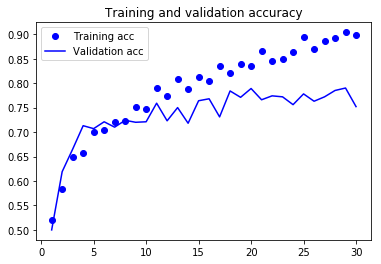

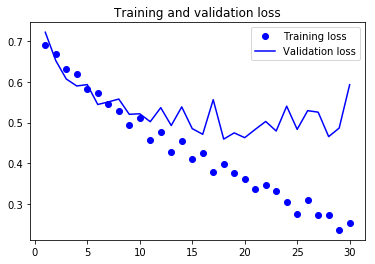

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
